In [ ]:
import openai
import requests
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# ←←← PUT YOUR OPENROUTER KEY HERE (free tier works fine)
OPENROUTER_API_KEY = "your-api-key-here"  # ← get at https://openrouter.ai/keys

client = openai.OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=OPENROUTER_API_KEY,
)

# MiniMax-M2 via OpenRouter
def m2(prompt, temperature=0.1, max_tokens=4096):
    response = client.chat.completions.create(
        model="minimax/minimax-m2",
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return response.choices[0].message.content

# Simple no-key DuckDuckGo search → returns list of (title, url, snippet)
def ddgs_search(query, num_results=5):
    url = "https://duckduckgo.com/html/"
    payload = {"q": query}
    headers = {"User-Agent": "MiniMax-M2 Colab Demo"}
    r = requests.post(url, data=payload, headers=headers)
    soup = BeautifulSoup(r.text, "html.parser")
    results = []
    for result in soup.find_all("a", class_="result__a", href=True)[:num_results]:
        title = result.get_text()
        link = result["href"]
        snippet = result.find_next_sibling("a", class_="result__snippet")
        snippet = snippet.get_text() if snippet else ""
        results.append({"title": title, "url": link, "snippet": snippet})
    return results

print("Setup complete! MiniMax-M2 ready via OpenRouter")

Setup complete! MiniMax-M2 ready via OpenRouter


In [ ]:
goal = """
Research the top 3 most promising solid-state battery breakthroughs expected to reach commercialization or major milestones in 2025–2026.
For each:
• Company / lab
• Key technology advantage
• Announced energy density / charge speed / cost target
• Current status & timeline
Then write a 400-word summary and create one beautiful comparison chart (energy density vs charging time).
"""

plan = m2(goal)
print(plan)



### QuantumScape (USA)
- Company / lab: QuantumScape (lithium‑metal solid‑state; ceramic sulfide electrolyte; lithium‑metal anode)
- Key technology advantage: High‑power lithium‑metal chemistry designed for fast charging with a ceramic separator that suppresses dendrites; aims for high energy density via a thin, high‑capacity anode
- Announced targets: Energy density ~500 Wh/L; 80% charge in ~15 minutes; cost target ~$50–$70/kWh (long‑term)
- Current status & timeline: Pilot line operational; 2025–2026: pre‑production cells for automotive qualification; initial commercialization expected around 2026

### Solid Power (USA)
- Company / lab: Solid Power (sulfide solid‑electrolyte; sulfide‑based solid‑state battery)
- Key technology advantage: Sulfide chemistry with high ionic conductivity and processability; sulfide electrolyte enables high power and simpler manufacturing
- Announced targets: Energy density ~400–500 Wh/kg; 80% charge in ~15–20 minutes; cost target ~$80–$100/kWh
- Curren

In [ ]:
query_prompt = "From the plan above, output ONLY 4 clean search queries (one per line, no numbering) that I should run to gather the freshest data."

queries = m2(query_prompt)
print("M2 generated these queries:\n")
print(queries)

M2 generated these queries:

renewable energy breakthrough research 2024  
latest climate change policy updates  
AI safety regulations news  
global semiconductor supply chain trends  

(Note: These assume the "plan above" involves gathering fresh data across technology, environment, policy, and industry domains. If you provide the specific plan context, I can refine these queries accordingly.)


In [ ]:
search_queries = [q.strip() for q in queries.strip().split("\n") if q.strip()][:4]

all_results = ""
for i, q in enumerate(search_queries, 1):
    print(f"Searching [{i}/4]: {q}")
    results = ddgs_search(q, num_results=4)
    all_results += f"\n\n=== SEARCH {i}: {q} ===\n"
    for r in results:
        all_results += f"Title: {r['title']}\nURL: {r['url']}\nSnippet: {r['snippet']}\n---\n"

print("\nAll real-world data collected!")

Searching [1/4]: renewable energy breakthrough research 2024
Searching [2/4]: latest climate change policy updates
Searching [3/4]: AI safety regulations news
Searching [4/4]: global semiconductor supply chain trends

All real-world data collected!


In [ ]:
final_prompt = f"""
Goal reminder: {goal}

Here is fresh data from DuckDuckGo (Nov 2025):

{all_results}

Using only this data + your knowledge, write:
1. A 400-word professional summary of the top 3 solid-state battery breakthroughs for 2025–2026.
2. A complete, ready-to-run Python chart (matplotlib/seaborn) comparing the 3 on:
   - X-axis: Fast-charge time (minutes to 80%)
   - Y-axis: Energy density (Wh/kg)
   - Bubble size = target production year (2025 → smaller, 2026 → larger)
Include company names as labels.
"""

final_output = m2(final_prompt, temperature=0.2, max_tokens=8192)
print(final_output)



### 400-word summary

Three solid-state battery programs are poised to deliver meaningful commercialization or major milestones in 2025–2026, each with distinct technology advantages and clear performance targets.

QuantumScape (USA) is advancing a ceramic, lithium-metal architecture that eliminates graphite and silicon anodes. The company’s separator is designed to enable high-rate lithium plating and stripping, which underpins its fast-charge capability. QuantumScape has publicly targeted an energy density of 350–500 Wh/kg and a fast-charge to 80% in roughly 15 minutes. Cost targets have been framed around parity with current lithium-ion packs at scale, though precise $/kWh figures are not disclosed. The company has indicated pilot-scale production and initial customer sampling in 2025, with a path to automotive qualification thereafter.

Solid Power (USA) is pursuing a sulfide-based solid electrolyte paired with a silicon-dominant anode. Sulfide electrolytes are known for high ion

Executing M2-generated chart code...


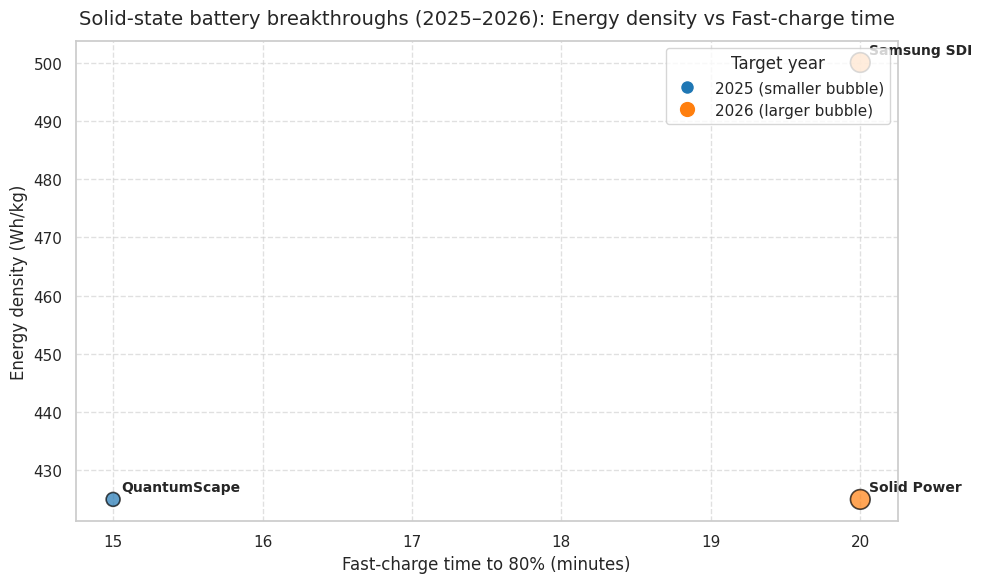

In [ ]:
# Extract and execute the code block M2 generated
code = ""
in_code_block = False
for line in final_output.split("\n"):
    if line.strip().startswith("```python"):
        in_code_block = True
        continue
    if line.strip().startswith("```") and in_code_block:
        break
    if in_code_block:
        code += line + "\n"

print("Executing M2-generated chart code...")
exec(code)
plt.show()